In [1]:
import nklsgen
import perlin_ls_gen
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
import numpy as np
import random
import pandas as pd

import sklearn
from sklearn.pipeline import Pipeline

In [2]:
# fig = plt.figure(figsize=(6,6))
# plt.xticks(range(10))
# plt.yticks(range(10))
# #plt.grid(color='green',linestyle='--')

# plt.tick_params(left = False, right = False , labelleft = False , 
#                 labelbottom = False, bottom = False) 
# plt.xlabel('Temperature',fontsize=15)
# plt.ylabel('Spice Level',fontsize=15)
# plt.title('Noodle Dishes',fontsize=20)
# plt.show()

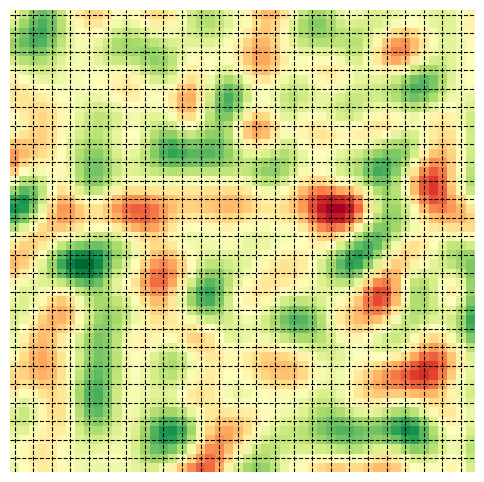

In [40]:
plt.figure(figsize=(6,6))
plt.xticks(range(50))
plt.yticks(range(50))
plt.grid(color='black',linestyle='--')

landscapes = perlin_ls_gen.generate_landscapes(50,50,6,1)
sns.heatmap(landscapes[0], cmap=sns.color_palette("RdYlGn", as_cmap=True), cbar=False)

plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

plt.savefig('output/PoliSciVis/perlinls_ex1.png')

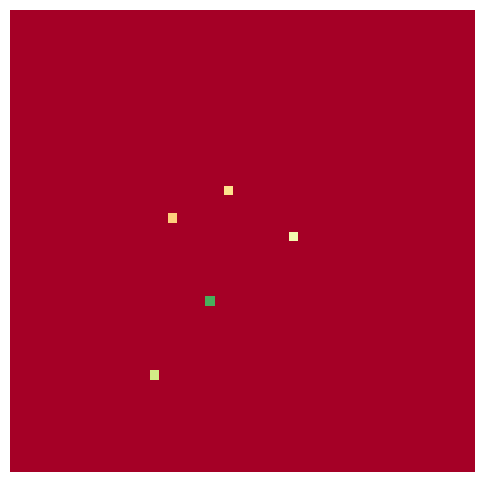

In [95]:
temp = landscapes[0]
temp_mask = np.zeros(temp.shape)
starts = [(random.randint(0,49),random.randint(0,49)) for _ in range(5)]
for start in starts:
    temp_mask[start] = 1

plt.figure(figsize=(6,6))

veiled = temp*temp_mask
sns.heatmap(veiled, vmin=0, vmax=1, cmap=sns.color_palette("RdYlGn", as_cmap=True), cbar=False)

plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

plt.savefig('output/PoliSciVis/groupsearch_ex1.png')

In [96]:
np.where(veiled>0)

(array([19, 22, 24, 31, 39]), array([23, 17, 30, 21, 15]))

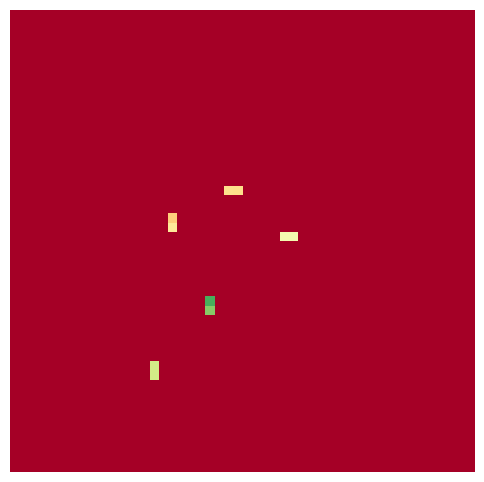

In [109]:
temp_mask2 = temp_mask.copy()
temp_mask2[19,24] = 1
temp_mask2[23,17] = 1
temp_mask2[24,29] = 1
temp_mask2[32,21] = 1
temp_mask2[38,15] = 1
veil2 = temp*temp_mask2

plt.figure(figsize=(6,6))

sns.heatmap(veil2, vmin=0, vmax=1, cmap=sns.color_palette("RdYlGn", as_cmap=True), cbar=False)

plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

plt.savefig('output/PoliSciVis/groupsearch_1step.png')

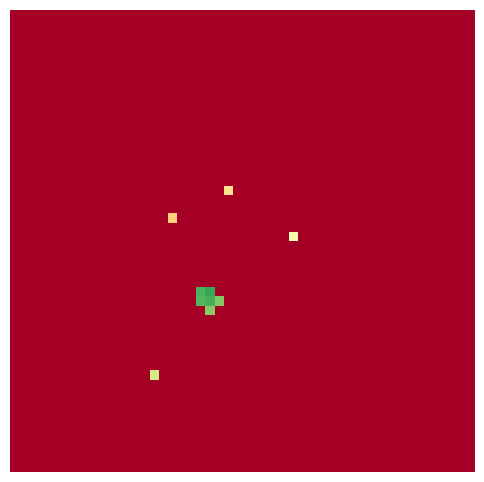

In [110]:
temp_mask3 = temp_mask.copy()
temp_mask3[31,20] = 1
temp_mask3[31,22] = 1
temp_mask3[30,21] = 1
temp_mask3[32,21] = 1
temp_mask3[30,20] = 1
veil3 = temp*temp_mask3

plt.figure(figsize=(6,6))

sns.heatmap(veil3, vmin=0, vmax=1, cmap=sns.color_palette("RdYlGn", as_cmap=True), cbar=False)

plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

plt.savefig('output/PoliSciVis/groupsearch_copybest.png')

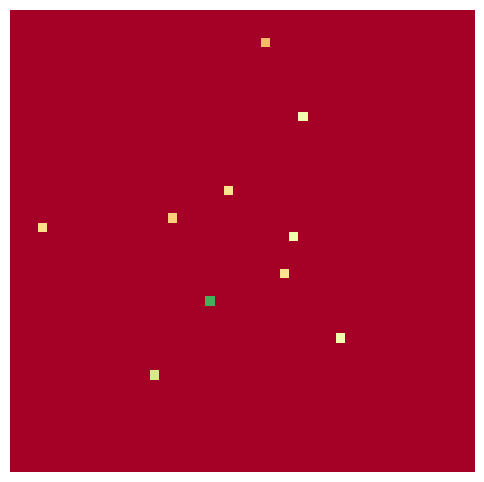

In [118]:
temp_mask4 = temp_mask.copy()
starts = [(random.randint(0,49),random.randint(0,49)) for _ in range(5)]
for start in starts:
    temp_mask4[start] = 1
veil3 = temp*temp_mask4

plt.figure(figsize=(6,6))

sns.heatmap(veil3, vmin=0, vmax=1, cmap=sns.color_palette("RdYlGn", as_cmap=True), cbar=False)

plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

plt.savefig('output/PoliSciVis/groupsearch_random.png')

In [3]:
#help(nklsgen.generate_landscapes)

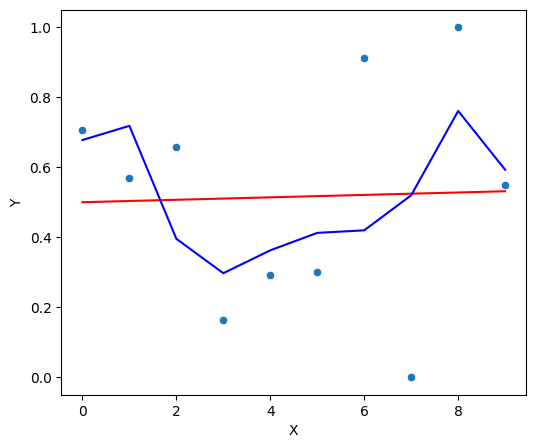

In [64]:
landscapes = nklsgen.generate_landscapes(1,0,1,base=10)
x = np.array(range(10)).reshape(-1,1)

# Linear Regression
reg = sklearn.linear_model.LinearRegression()
reg.fit(x,landscapes[0])
y_pred = reg.predict(x)

# Polynomial Regression
poly = sklearn.preprocessing.PolynomialFeatures(degree=2).fit_transform(x)
model = Pipeline([('poly', sklearn.preprocessing.PolynomialFeatures(degree=3)),
                  ('linear', sklearn.linear_model.LinearRegression(fit_intercept=False))])
model.fit(poly,landscapes[0])
y2_pred = model.predict(poly)

fig = plt.figure(figsize=(6,5))
sns.scatterplot(landscapes[0])
plt.plot(x,y_pred,color='red')
plt.plot(x,y2_pred,color='blue')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

<Axes: >

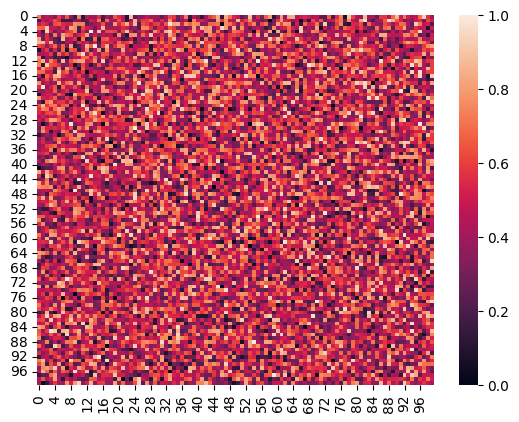

In [2]:
landscapes = nklsgen.generate_landscapes(2,1,1,base=100)
sns.heatmap(landscapes[0])

<Axes: >

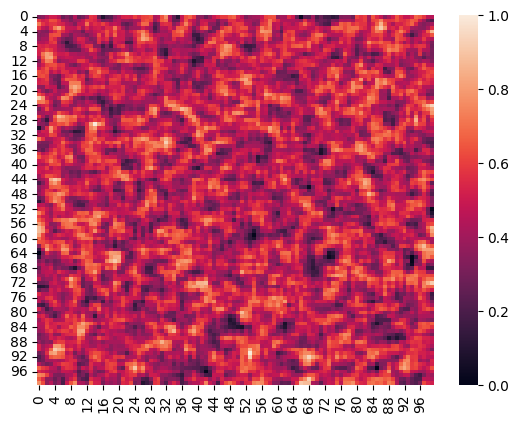

In [11]:
landscapes = nklsgen.generate_landscapes(2,1,1,smooth=[1,1,0],base=100)
sns.heatmap(landscapes[0])

<Axes: >

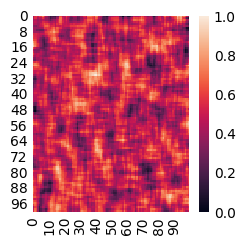

In [4]:
landscapes = nklsgen.generate_landscapes(2,1,1,smooth=[2,3,0],base=100)
sns.heatmap(landscapes[0])

In [5]:
ls = landscapes[0]
locs = [loc for loc,val in np.ndenumerate(ls)]
vals = [val for loc,val in np.ndenumerate(ls)]
x = [a[0] for a in locs]
y = [a[1] for a in locs]
data = {'x':x, 'y':y, 'val':vals}
df_ = pd.DataFrame(data)
df_ = df_.pivot(index='x', columns='y', values='val')
x_ = np.tile(np.array(df_.index), (len(df_.index),1)).T
y_ = np.tile(np.array(df_.columns), (len(df_.columns),1))
z_ = df_.values

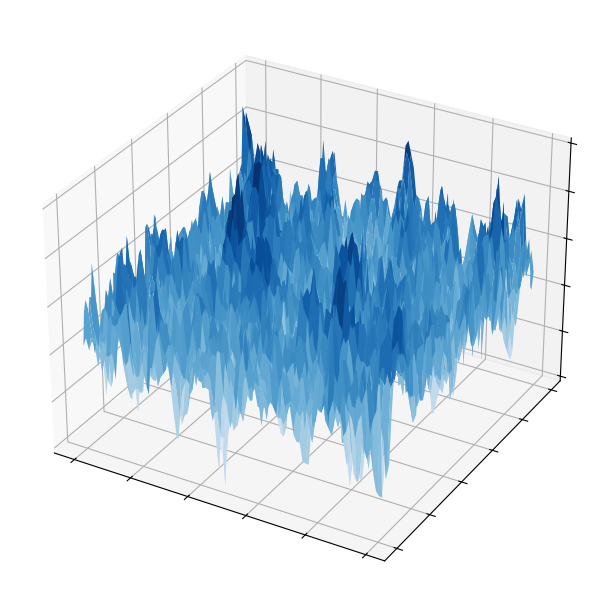

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm

plt.style.use('_mpl-gallery')

# Plot the surface
fig, ax = plt.subplots(figsize=(6,6),subplot_kw={"projection": "3d"})
ax.plot_surface(x_,y_,z_, vmin=z_.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.savefig('landscape_visuals/nk_100x100.pdf')
plt.show()